In [53]:
from urllib.request import urlretrieve
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x1c727be8050>)

In [54]:
import pandas as pd
medical_df = pd.read_csv('medical.csv')
medical_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [55]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [56]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [57]:
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline

In [58]:
sns.set_style('darkgrid')
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [59]:
fig = px.histogram(medical_df,
                   x='age',
                   marginal='box',
                   nbins=47,
                   title='Age Distribution')
fig.update_layout(bargap=0.1)
fig.show()

In [60]:
# bmi = Body Mass Index: weight (kg) / height (m)^2
fig = px.histogram(medical_df,
                   x='bmi',
                   marginal='box',
                   color_discrete_sequence=['red'],
                   title='BMI Distribution')
fig.update_layout(bargap=0.1)
fig.show()

In [61]:
#charges according to smoking status
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color='smoker',
                   color_discrete_sequence=['green', 'grey'],
                   title='Charges Distribution')
fig.update_layout(bargap=0.1)
fig.show()

In [62]:
# charges according to region
fig = px.histogram(medical_df,
                   x = 'charges',
                   marginal = 'box',
                   color='region',
                   color_discrete_sequence=['#8e7cc3','#c27ba0',"#63b987","#af6868"],
                   title='Charges Distribution by Region')
fig.update_layout(bargap=0.1)
fig.show()

In [63]:
# charges according to sex
fig = px.histogram(medical_df,
                   x = 'charges',
                   marginal = 'box',
                   color='sex',
                   color_discrete_sequence=["#9a79ff","#f767b1"],
                   title='Charges Distribution by Sex')
fig.update_layout(bargap=0.1)
fig.show()

In [64]:
#smoker distribution
fig = px.histogram(medical_df,
                   x='smoker',
                   color = 'sex',
                   title='Smoker Distribution')
fig.update_layout(bargap=0.1)
fig.show()

In [65]:
# distribution of se by region
fig = px.histogram(medical_df,
                   x='region',
                   color='sex',
                   title='Distribution of Sex by Region',)
fig.update_layout(bargap=0.1)
fig.show()

In [66]:
# children distribution
fig = px.histogram(medical_df,
                   x='children',
                   color='sex',
                   title='Children Distribution')
fig.update_layout(bargap=0.1)
fig.show()

In [67]:
# relationship between age and charges
fig = px.scatter(medical_df,
                 x='age',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='Age vs Charges')
fig.update_traces(marker_size=5)
fig.show()

In [68]:
# bmi and charges
fig = px.scatter(medical_df,
                 x='bmi',
                 y='charges',
                 color='smoker',
                 opacity=0.8,
                 hover_data=['sex'],
                 title='BMI vs Charges')
fig.update_traces(marker_size=5)
fig.show()

In [69]:
# violin plot for children and charges
fig = px.violin(medical_df,
                y='charges',
                x='children',
                color='children',
                title='Charges Distribution by Number of Children') 
fig.show()

In [70]:
# correlation 
medical_df.charges.corr(medical_df.age)

np.float64(0.2990081933306478)

In [71]:
smoker_values = {'yes':1, 'no':0}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

np.float64(0.7872514304984778)

In [72]:
medical_df.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

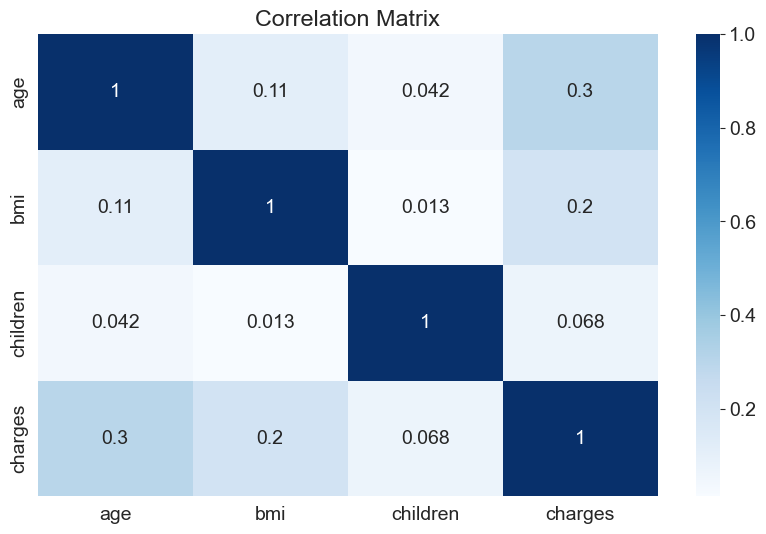

In [73]:
sns.heatmap(medical_df.corr(numeric_only=True), annot=True, cmap='Blues')
plt.title('Correlation Matrix')

<Axes: title={'center': 'Age vs Charges for Non-Smokers'}, xlabel='age', ylabel='charges'>

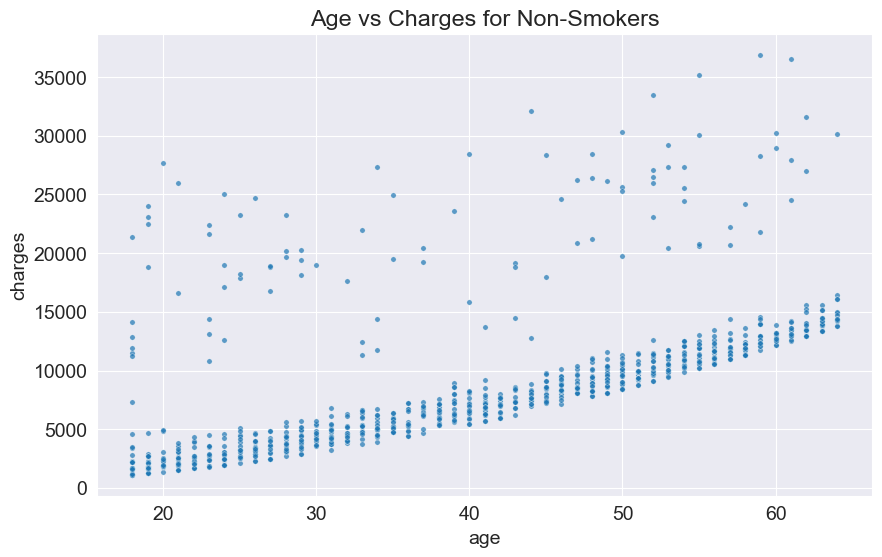

In [74]:
#estimating value of charges using value of non smokers and non smokers
non_smoker_df = medical_df[medical_df.smoker == 'no']
plt.title('Age vs Charges for Non-Smokers')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7,s=15)

In [75]:
'''
    charges = w * age + b
'''
def estimate_charges(age, w, b):
    charges = w * age + b
    return charges

w = 267
b=-2091 #let's assume a base charge of 20 for a newborn

ages = non_smoker_df.age
actual_charges = non_smoker_df.charges

predicted_charges = [estimate_charges(age, w, b) for age in ages]
print(predicted_charges[:5])

[2715, 5385, 6720, 6453, 6186]


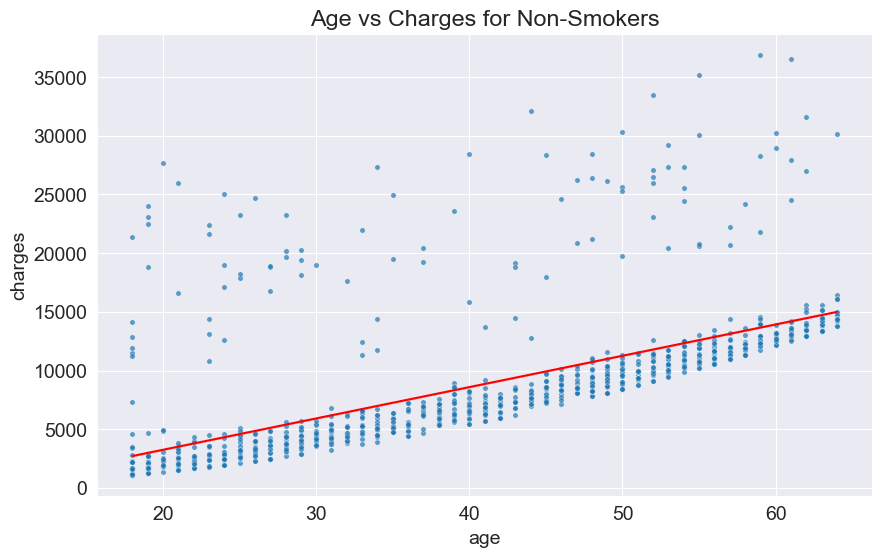

In [76]:
#ploting the predicted charges
plt.title('Age vs Charges for Non-Smokers')
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7,s=15)
sns.lineplot(x=ages, y=predicted_charges, color='red')
plt.show()

In [77]:
import numpy as np
targets = np.array(actual_charges)
predictions = np.array(predicted_charges)
rmse = np.sqrt(np.mean((predictions - targets) ** 2))
rmse

np.float64(4662.516524487403)

In [78]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.

    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.

    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.

        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.

    Returns
    -------
    self : object
        Fitted Estimator.



In [79]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df['charges']
model.fit(inputs, targets)
model.coef_, model.intercept_

(array([267.24891283]), np.float64(-2091.4205565650864))

In [80]:
model.predict([[40],[30],[61],[23]])

C:\Users\KUSHANKUR\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 8598.53595668,  5926.04682837, 14210.76312614,  4055.30443855])

In [81]:
predictions = model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289], shape=(1064,))

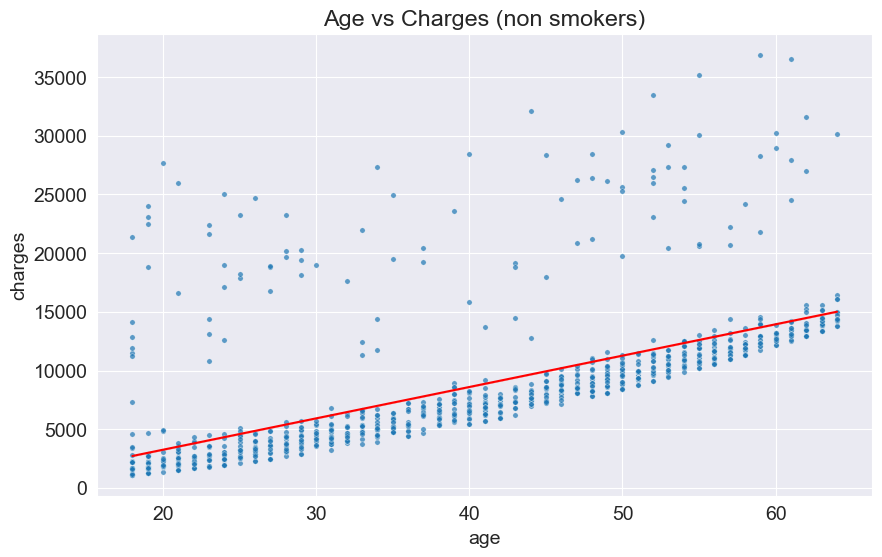

In [82]:
plt.title("Age vs Charges (non smokers)")
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7,s=15)
sns.lineplot(data=non_smoker_df, x='age', y=predictions,color='red')
plt.show()

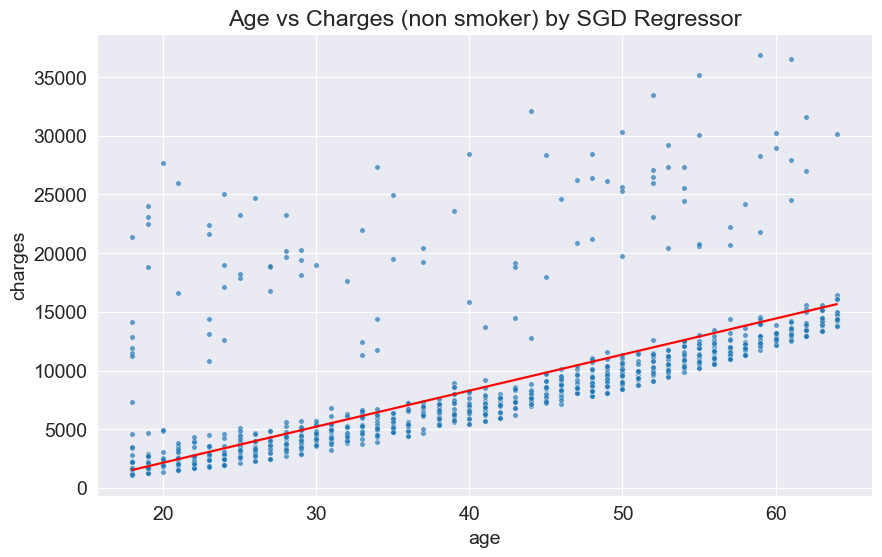

In [83]:
# using SGD Regressor class
from sklearn.linear_model import SGDRegressor
model = SGDRegressor()
model.fit(inputs,targets)

predictions = model.predict(inputs)

plt.title("Age vs Charges (non smoker) by SGD Regressor")
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7,s=15)
sns.lineplot(data=non_smoker_df, x='age', y=predictions, color='red')
plt.show()

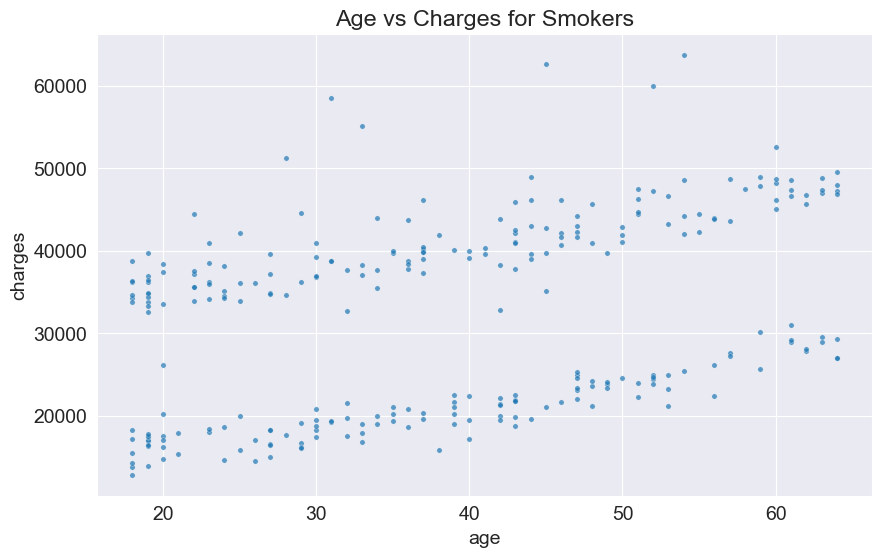

In [84]:
# smokers
smokers_df = medical_df[medical_df.smoker == 'yes']
plt.title('Age vs Charges for Smokers')
sns.scatterplot(data=smokers_df, x='age', y='charges', alpha=0.7,s=15)
plt.show()

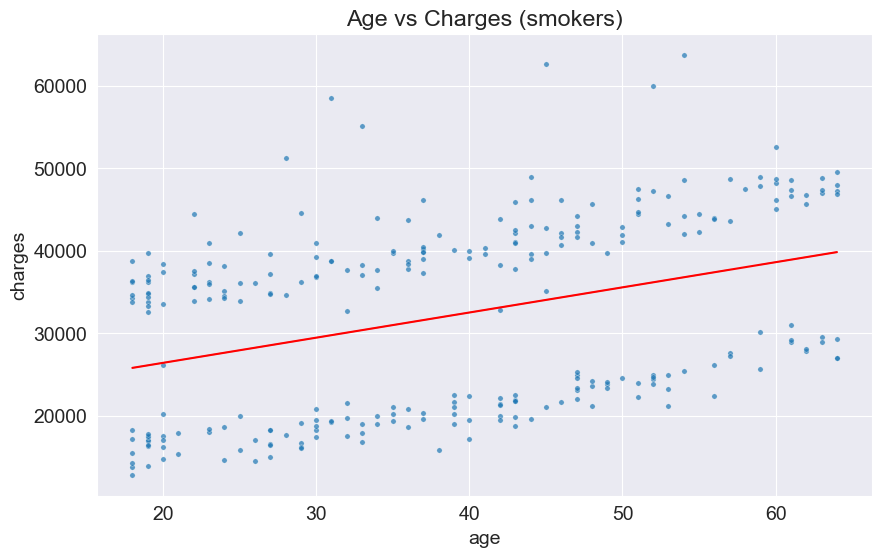

In [85]:
inputs = smokers_df[['age']]
targets = smokers_df['charges']

model_3 = LinearRegression()
model_3.fit(inputs,targets)

predictions = model_3.predict(inputs)

plt.title("Age vs Charges (smokers)")
sns.scatterplot(data=smokers_df, x='age', y='charges', alpha=0.7,s=15)
sns.lineplot(data=smokers_df, x='age', y=predictions, color='red')
plt.show()

In [86]:
# adding parameter "bmi" with age to estimate charges
inputs, targets = non_smoker_df[['age','bmi']], non_smoker_df['charges']

model = LinearRegression().fit(inputs,targets)
predictions = model.predict(inputs)

In [87]:
# categorical parameters
smoker_codes = {'no': 0, 'yes': 1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)

In [88]:
medical_df.charges.corr(medical_df.smoker_code)

np.float64(0.7872514304984778)

In [89]:
inputs, targets = medical_df[['age','bmi','children','smoker_code']], medical_df['charges']

model = LinearRegression().fit(inputs,targets)
predictions = model.predict(inputs)

C:\Users\KUSHANKUR\AppData\Local\Temp\ipykernel_12612\3671504899.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




<Axes: xlabel='region', ylabel='charges'>

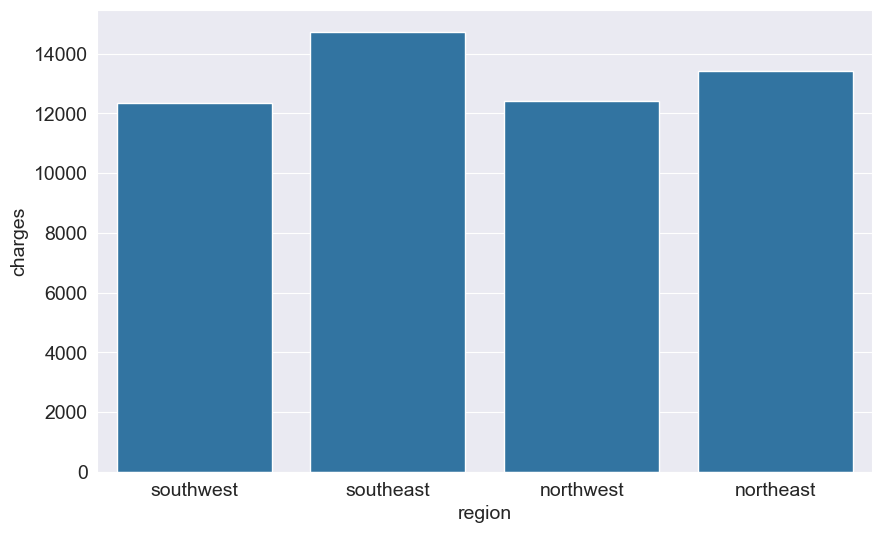

In [90]:
# one hot encoding for region
sns.barplot(data=medical_df, x='region', y='charges', ci=None)

In [91]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse_output=False)
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [92]:
one_hot = enc.transform(medical_df[['region']])
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]], shape=(1338, 4))

In [93]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0


In [94]:
medical_df[['northeast','northwest','southeast','southwest']] = one_hot
medical_df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,0.0,1.0,0.0,0.0


In [95]:
sex_codes = {'male': 1, 'female': 0}
medical_df['sex_code'] = medical_df.sex.map(sex_codes)
medical_df.head()

,age,sex,bmi,children,smoker,region,charges,smoker_code,northeast,northwest,southeast,southwest,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,0.0,0.0,0.0,1.0,0
1,18,male,33.770,1,no,southeast,1725.55230,0,0.0,0.0,1.0,0.0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,0.0,0.0,1.0,0.0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,0.0,1.0,0.0,0.0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,0.0,1.0,0.0,0.0,1


In [97]:
input_cols = ['age','bmi','children','smoker_code','sex_code','northeast','northwest','southeast','southwest']
inputs, targets = medical_df[input_cols], medical_df['charges']

model = LinearRegression().fit(inputs,targets)
predictions = model.predict(inputs)

loss = np.sqrt(np.mean((predictions - targets) ** 2))
loss

np.float64(6041.6796511744515)